In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_df = pd.read_csv('heart-disease.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


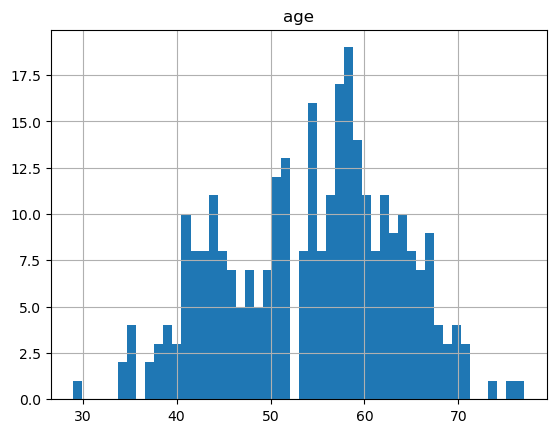

In [7]:
heart_df.hist("age", bins=50)
plt.show()

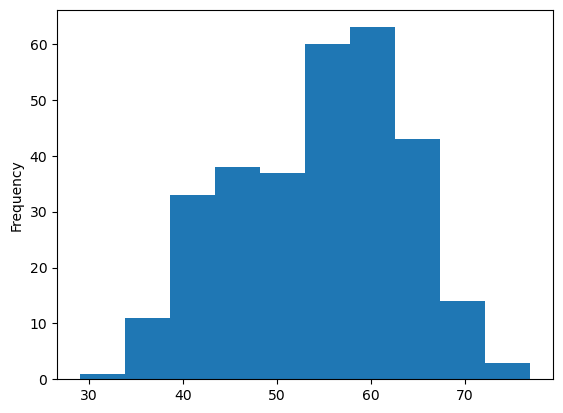

In [14]:
heart_df["age"].plot.hist()
plt.show()

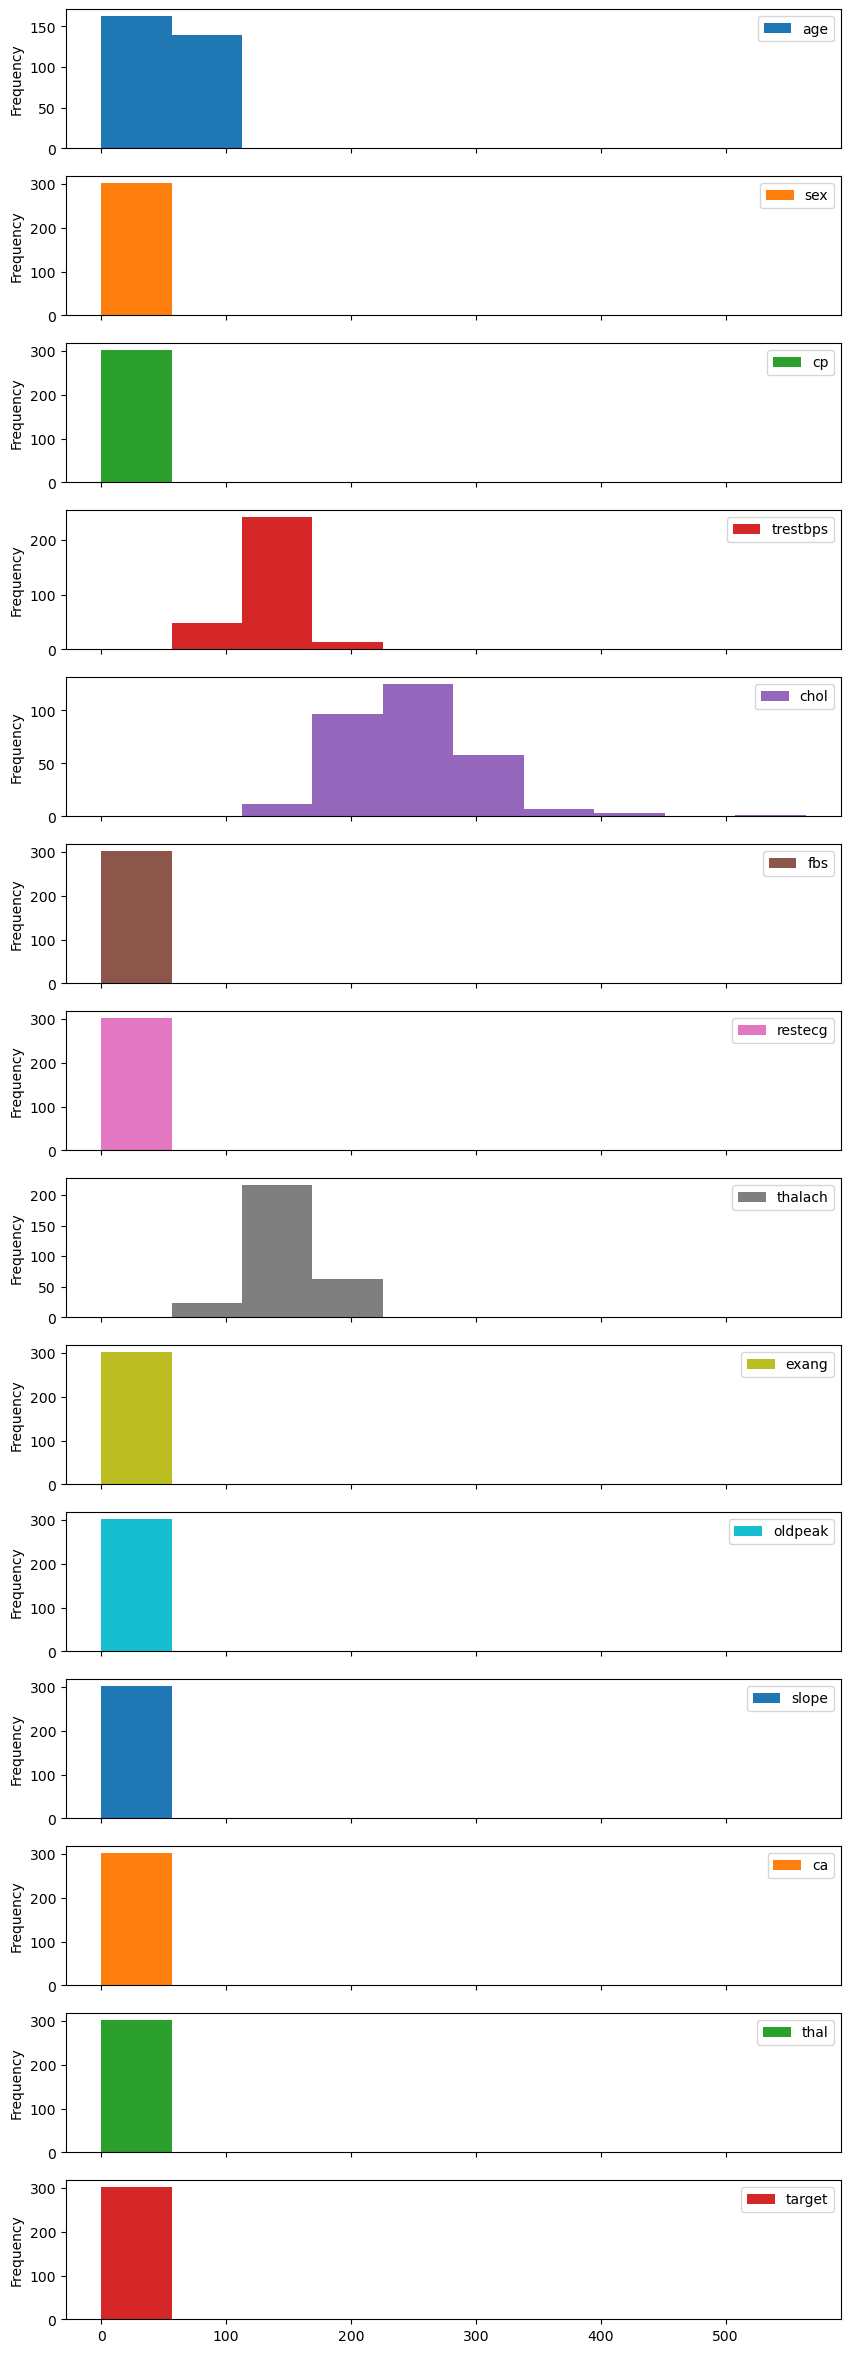

In [19]:
heart_df.plot.hist(subplots=True,figsize=(10,30))
plt.show()

In [34]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
abnormal_cholesterol_over50 = heart_df[(heart_df['age'] >= 50) | (heart_df['chol'] < 200) | (heart_df['chol'] >= 240)]
abnormal_cholesterol_over50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


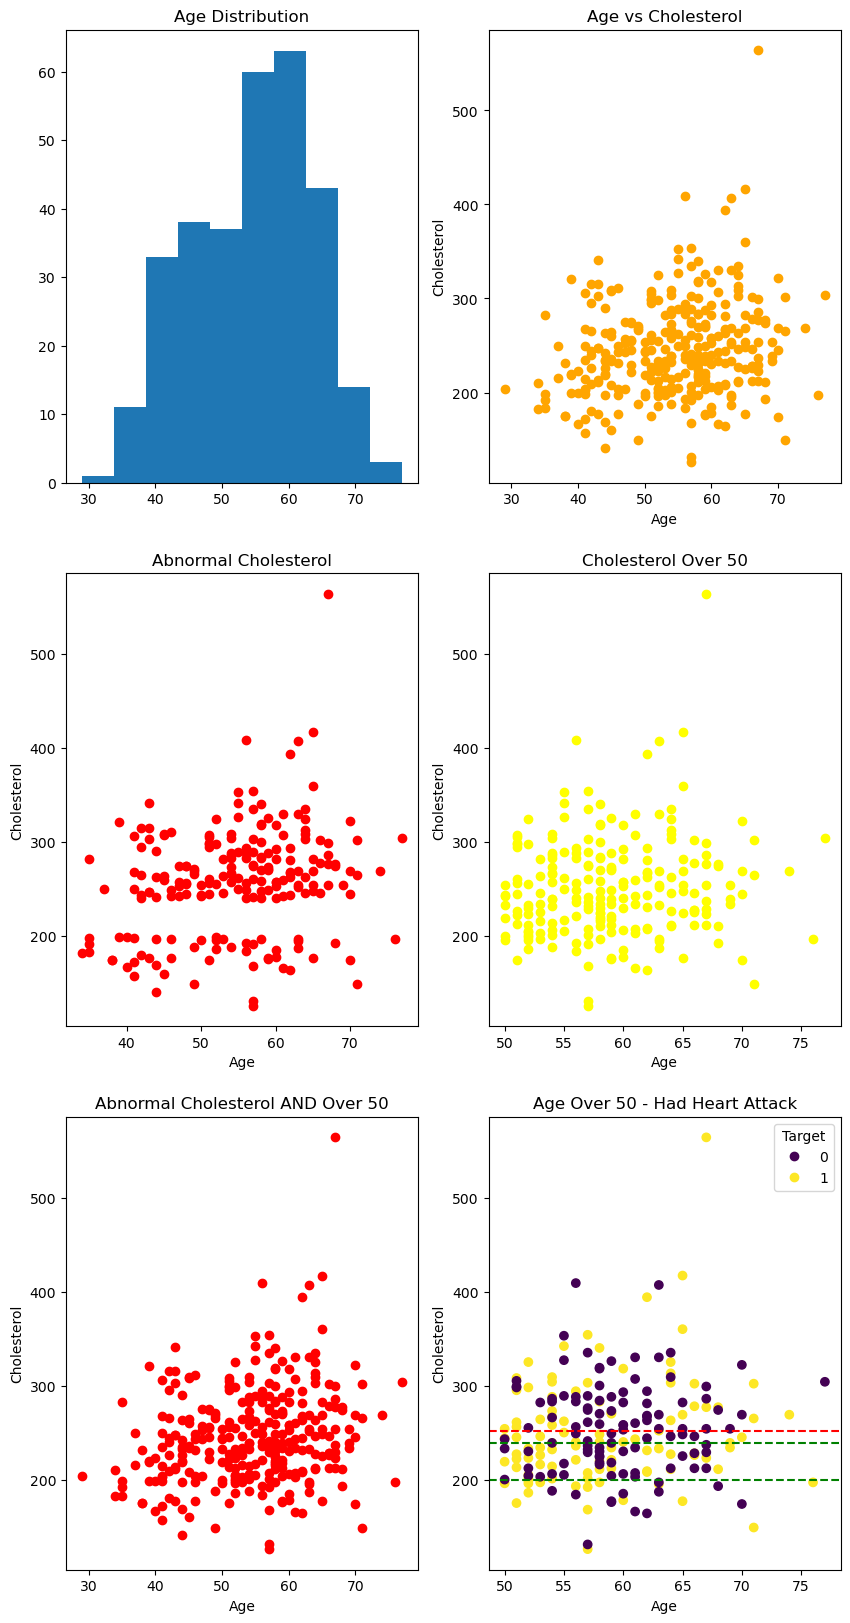

In [90]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,20))

ax1.hist(x=heart_df['age'])
ax1.set(title='Age Distribution')

ax2.scatter(x=heart_df['age'],y=heart_df['chol'],color='orange')
ax2.set(title='Age vs Cholesterol',xlabel='Age',ylabel='Cholesterol')

abnormal_cholesterol = heart_df[(heart_df['chol'] < 200) | (heart_df['chol'] >= 240)]
over50 = heart_df[heart_df['age'] >= 50]
abnormal_cholesterol_over50 = heart_df[heart_df['age'] >= 50 & ((heart_df['chol'] < 200) | (heart_df['chol'] >= 240))]

ax3.scatter(x=abnormal_cholesterol['age'],y=abnormal_cholesterol['chol'],color='red')
ax4.scatter(x=over50['age'],y=over50['chol'],color='yellow')
ax5.scatter(x=abnormal_cholesterol_over50['age'],y=abnormal_cholesterol_over50['chol'],color='red')
ax3.set(title='Abnormal Cholesterol',xlabel='Age',ylabel='Cholesterol')
ax4.set(title='Cholesterol Over 50',xlabel='Age',ylabel='Cholesterol')
ax5.set(title='Abnormal Cholesterol AND Over 50',xlabel='Age',ylabel='Cholesterol')


sc6 = ax6.scatter(x=over50['age'],y=over50['chol'],c=over50['target'])
ax6.set(title='Age Over 50 - Had Heart Attack',xlabel='Age',ylabel='Cholesterol')
ax6.axhline(y=200,color='green',linestyle='--')
ax6.axhline(y=239,color='green',linestyle='--')
ax6.axhline(y=over50['chol'].mean(),color='red',linestyle='--')
ax6.legend(*sc6.legend_elements(), title='Target')

plt.show()

In [91]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


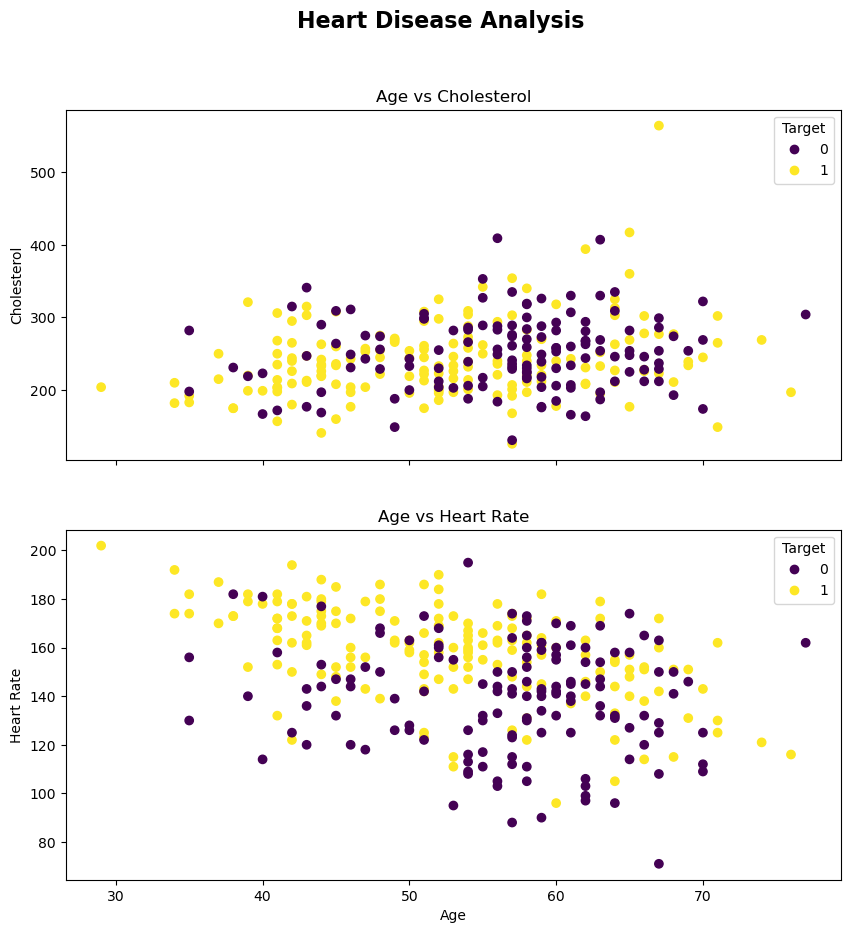

In [113]:
fig, ( (ax1), (ax2) )  = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

# Age vs Cholesterol
plot1 = ax1.scatter(x=heart_df['age'], y=heart_df['chol'],c=heart_df['target'])
ax1.set(title='Age vs Cholesterol', ylabel='Cholesterol')
ax1.legend(*plot1.legend_elements(), title='Target')

# Age vs Heart Rate
plot2 = ax2.scatter(x=heart_df['age'], y=heart_df['thalach'],c=heart_df['target'])
ax2.set(title='Age vs Heart Rate', xlabel='Age', ylabel='Heart Rate')
ax2.legend(*plot2.legend_elements(), title='Target')

fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold')

plt.show()

In [114]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [180]:
plt.style.use('seaborn-v0_8-whitegrid')

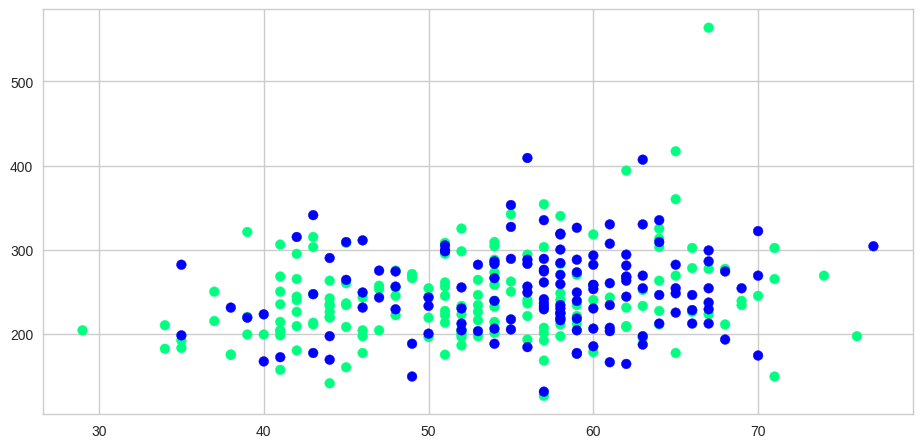

In [183]:
# Age Distribution
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(x=heart_df["age"],y=heart_df["chol"],c=heart_df['target'],cmap='winter')

plt.show()